# Training a Multi-layer Neural Networks Using Scikit-learn

### Load MNIST Dataset

In [1]:
# from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
import numpy as np
from scipy import io

mnist = io.loadmat('mnist-original.mat')
mnist

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

### Splitting data

In [2]:
X, y = mnist['data'], mnist['label']
X.shape

(784, 70000)

In [3]:
y.shape

(1, 70000)

In [4]:
X = np.array(X).T # transpose
X.shape

(70000, 784)

In [5]:
y = np.array(y).T
y.shape

(70000, 1)

In [6]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [7]:
y[0]

array([0.])

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

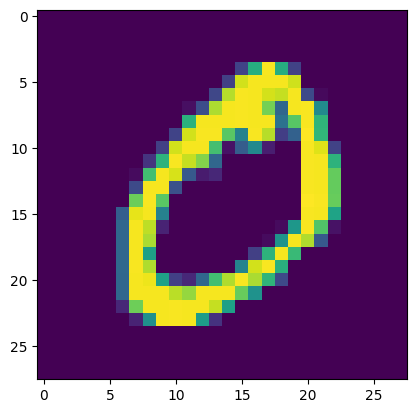

In [8]:
%matplotlib inline 
ex1 = X[0] 
ex1_image = ex1.reshape(28, 28) 
plt.imshow(ex1_image) 
plt.plot

In [9]:
X = X / 255.0

In [10]:
# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

### Building a Multi-layer Neural Networks and Training the model

In [11]:
from sklearn.neural_network import MLPClassifier

###################################################################################
# fill your code here
#

# create the model - an instance of MLPClassifier 
# with hidden_layer (100, 50), max_iteration 100, solver 'sgd', learning rate 0.01
# 모델 생성
model = MLPClassifier(hidden_layer_sizes=(100, 50),
                      max_iter=100,
                      solver='sgd',
                      learning_rate_init=0.01,
                      verbose=True, # 진행률 메시지 출력
                      random_state=1
                      )

# Train the model with the training data
# 훈련
model.fit(X_train, y_train)

###################################################################################


/Users/wonjunjo/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.58384482
Iteration 2, loss = 0.27066267
Iteration 3, loss = 0.21991119
Iteration 4, loss = 0.18584383
Iteration 5, loss = 0.15980513
Iteration 6, loss = 0.14013787
Iteration 7, loss = 0.12354878
Iteration 8, loss = 0.11053100
Iteration 9, loss = 0.09940894
Iteration 10, loss = 0.09034450
Iteration 11, loss = 0.08266005
Iteration 12, loss = 0.07537817
Iteration 13, loss = 0.06989139
Iteration 14, loss = 0.06438875
Iteration 15, loss = 0.05957101
Iteration 16, loss = 0.05587369
Iteration 17, loss = 0.05150477
Iteration 18, loss = 0.04828902
Iteration 19, loss = 0.04533914
Iteration 20, loss = 0.04240524
Iteration 21, loss = 0.03974401
Iteration 22, loss = 0.03689032
Iteration 23, loss = 0.03455141
Iteration 24, loss = 0.03236965
Iteration 25, loss = 0.03078264
Iteration 26, loss = 0.02864525
Iteration 27, loss = 0.02688902
Iteration 28, loss = 0.02496853
Iteration 29, loss = 0.02378442
Iteration 30, loss = 0.02214019
Iteration 31, loss = 0.02078791
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 50), learning_rate_init=0.01,
              max_iter=100, random_state=1, solver='sgd', verbose=True)

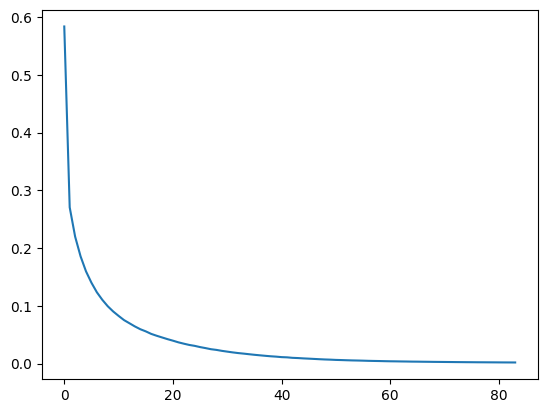

In [12]:
plt.plot(model.loss_curve_)
plt.show()

In [13]:
print("Training set score: %f" % model.score(X_train, y_train))
print("Test set score: %f" % model.score(X_test, y_test))

Training set score: 0.999983
Test set score: 0.977400


### Prediction using the model

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

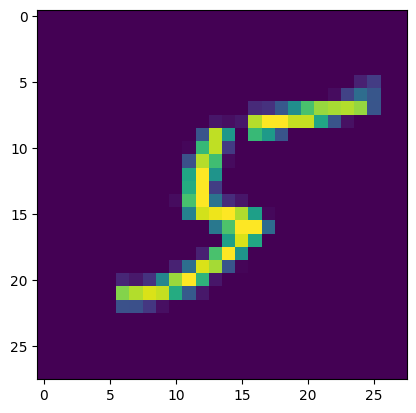

In [14]:
%matplotlib inline 
ex1 = X[35000] 
ex1_image = ex1.reshape(28, 28) 
plt.imshow(ex1_image) 
plt.plot

In [15]:
model.predict([ex1])

array([5.])

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

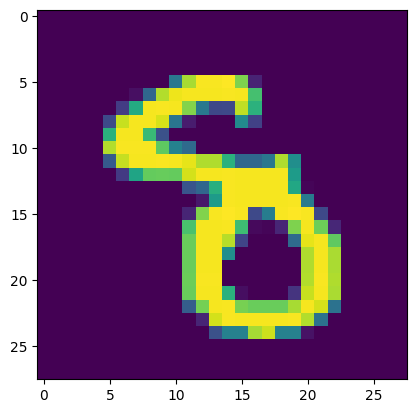

In [16]:
%matplotlib inline 
ex2 = X[50000] 
ex2_image = ex2.reshape(28, 28) 
plt.imshow(ex2_image) 
plt.plot

In [17]:
model.predict([ex2])

array([8.])